## Notebook for example code runing

In [1]:
import matplotlib.pyplot as plt
import time
import numpy as np
import collections

from tr_ap_xps.peak_fitting import get_peaks

In [6]:
def plot_peak_locations_for_raw_data():
    """
    This function will plot the peak locations for the entire data with path specified
    """
    
    # the input npy file is a test array of shape (300, 1131)
    # which represents 300 integrated frames
    file_path = "../src/_tests/test_array_300_1131.npy"
    
    array = np.load(file_path)
    print(array.shape)

    x = np.arange(array.shape[1])
    peak_locations = collections.defaultdict(list)
    start_time = time.time()
    for i in range(array.shape[0]):
        y = array[i, :]
        return_list, unfit_list, fit_list, residual, base_list = get_peaks(x, y, 2, 'g')
        for peak in return_list:
            peak_locations[i].append(peak['index'])

    print(time.time() - start_time, "s") # 28 s for 300 frames
    # plot the location of first and second peak
    for key in peak_locations:
        peak_locations[key].sort()
    keys = list(peak_locations.keys())
    first_peak_locations = [peak_locations[key][0] for key in keys]
    second_peak_locations = [peak_locations[key][1] for key in keys]
    plt.figure(figsize=(10, 5))
    plt.plot(keys, first_peak_locations, label='First Peak Mean', marker='o')
    plt.plot(keys, second_peak_locations , label='Second Peak Mean', marker='o')
    plt.grid(True)
    plt.show()

(300, 1131)


/Users/runbojiang/anaconda3/lib/python3.11/site-packages/tr_ap_xps/peak_fitting.py:171: RuntimeWarning: invalid value encountered in log
  ref = np.log(ref+1)
/Users/runbojiang/anaconda3/lib/python3.11/site-packages/tr_ap_xps/peak_fitting.py:208: RuntimeWarning: invalid value encountered in divide
  if np.mean(residual/y_data) > 0.10:
/Users/runbojiang/anaconda3/lib/python3.11/site-packages/astropy/modeling/functional_models.py:180: RuntimeWarning: divide by zero encountered in divide
  return amplitude * np.exp(- 0.5 * (x - mean) ** 2 / stddev ** 2)
/Users/runbojiang/anaconda3/lib/python3.11/site-packages/astropy/modeling/functional_models.py:180: RuntimeWarning: invalid value encountered in divide
  return amplitude * np.exp(- 0.5 * (x - mean) ** 2 / stddev ** 2)


28.791520833969116 s


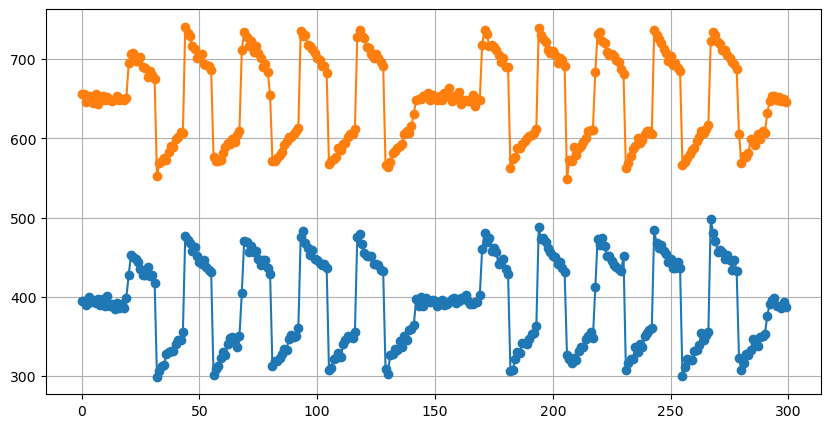

In [7]:
plot_peak_locations_for_raw_data()